# day21

In [38]:
import pandas as pd

In [41]:
df = pd.read_json("asset_data_analysis.json", orient="split")

In [42]:
df

,date,products,sales,costs
0,2021-11-20,cars,19234,12340
1,2021-12-12,boats,87598,67568
2,2021-12-06,houses,20989,11999
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [43]:
df.tail()

,date,products,sales,costs
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [84]:
df2 = df.copy()

In [85]:
df2

,date,products,sales,costs
0,2021-11-20,cars,19234,12340
1,2021-12-12,boats,87598,67568
2,2021-12-06,houses,20989,11999
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [86]:
pd.to_datetime(df2["date"])

0   2021-11-20
1   2021-12-12
2   2021-12-06
3   2021-11-07
4   2021-12-06
5   2021-12-09
6   2021-11-10
7   2021-12-06
Name: date, dtype: datetime64[ns]

In [87]:
df2["date"]

0   2021-11-20
1   2021-12-12
2   2021-12-06
3   2021-11-07
4   2021-12-06
5   2021-12-09
6   2021-11-10
7   2021-12-06
Name: date, dtype: datetime64[ns]

In [90]:
df4= df2.set_index("date", drop = False)

In [106]:
df3 = df4.groupby(df4.index).sum(numeric_only =True)
df3


,sales,costs
date,,
2021-11-07,15900,10910
2021-11-10,11879,5879
2021-11-20,19234,12340
2021-12-06,52421,32537
2021-12-09,56897,40447
2021-12-12,87598,67568


In [104]:
import matplotlib.pyplot as plt

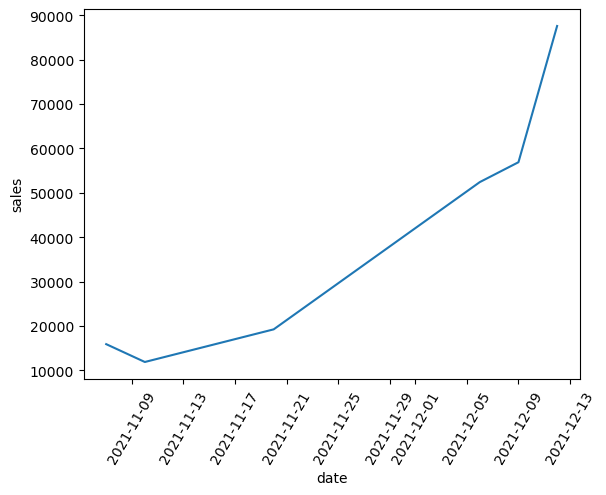

In [105]:
plt.plot(df3.index,df3.sales)
plt.ylabel("sales")
plt.xlabel("date")
plt.xticks(rotation =60)
plt.show()

In [242]:
df5 = df2.set_index(["date","products"])
df5

,,sales,costs
date,products,,
2021-11-20,cars,19234,12340
2021-12-12,boats,87598,67568
2021-12-06,houses,20989,11999
2021-11-07,cars,15900,10910
2021-12-06,boats,12087,7087
2021-12-09,cars,56897,40447
2021-11-10,cars,11879,5879
2021-12-06,houses,19345,13451


In [325]:
profit = df5.loc[(["2021-12-06"],"houses") ,["sales","costs"] ].sum()

In [326]:
profit

sales    40334
costs    25450
dtype: int64

In [255]:
a=profit["sales"]-profit["costs"]
a

14884

In [256]:
df2

,date,products,sales,costs
0,2021-11-20,cars,19234,12340
1,2021-12-12,boats,87598,67568
2,2021-12-06,houses,20989,11999
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [257]:
count = pd.value_counts(df2["products"])

In [258]:
count

products
cars      4
boats     2
houses    2
Name: count, dtype: int64

In [267]:
format_with_separator = lambda x: '{:,.0f}'.format(x)

In [269]:
df5[["sales","costs"]].applymap(format_with_separator)

,,sales,costs
date,products,,
2021-11-20,cars,"19,234","12,340"
2021-12-12,boats,"87,598","67,568"
2021-12-06,houses,"20,989","11,999"
2021-11-07,cars,"15,900","10,910"
2021-12-06,boats,"12,087","7,087"
2021-12-09,cars,"56,897","40,447"
2021-11-10,cars,"11,879","5,879"
2021-12-06,houses,"19,345","13,451"


In [347]:
df6 = df5.groupby("date").size().sort_values()


date
2021-11-07    1
2021-11-10    1
2021-11-20    1
2021-12-09    1
2021-12-12    1
2021-12-06    3
dtype: int64

In [308]:
a =list(df6).size()

AttributeError: 'list' object has no attribute 'size'

In [306]:
a

[(('boats',),
                       sales  costs
  date       products              
  2021-12-12 boats     87598  67568
  2021-12-06 boats     12087   7087),
 (('cars',),
                       sales  costs
  date       products              
  2021-11-20 cars      19234  12340
  2021-11-07 cars      15900  10910
  2021-12-09 cars      56897  40447
  2021-11-10 cars      11879   5879),
 (('houses',),
                       sales  costs
  date       products              
  2021-12-06 houses    20989  11999
             houses    19345  13451)]